# Exit Surveys - Data cleaning and analysis

In this project, we'll clean and analyze exit surveys from employees of the Department of Education, Training and Employment (DETE)}) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. 

## Introduction
    

In [43]:
# Reading csv data into datasets
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete.csv', encoding='Latin1' )
tafe_survey = pd.read_csv('tafe.csv',encoding='Latin1' )

# Options to not miss out columns in display
pd.options.display.max_columns = 150
pd.options.display.max_columns = 150
dete_survey.head()

dete_survey.columns
# number of columns
dete_survey.shape[1]



56

In [44]:
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
           'What is your Gender?': 'gender', 'CurrentAge.': 'age',
       'Employment Type.': 'employment_status',
       'Classification.': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey=tafe_survey.rename({'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
           'What is your Gender?': 'gender', 'CurrentAge.': 'age',
       'Employment Type.': 'employment_status',
       'Classification.': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, axis=1)



In [45]:
tafe_survey.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor.     Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal develo

Dete and Tafe have 56 and 72 columns respectively. Some columns in both datasets can be removed for analysis.


In [46]:
# Removing columns we don't need for our analysis
dete_survey_1 = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_1 = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [47]:
# Checking that columns are excluded
print(dete_survey_1.columns)
print(tafe_survey_1.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employmen

# Standardizing the column names

In [48]:
dete_survey_1.columns = dete_survey_1.columns.str.lower().str.strip().str.replace(' ', '_')

In [49]:
dete_survey_1.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

# Data Preparation

In [50]:
# Since we are concerned with employees who resigned, we will extract rows those rows
dete_survey_1['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [51]:
tafe_survey_1['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [52]:
dete_survey_1['separationtype'] = dete_survey_1['separationtype'].str.split('-').str[0]

In [53]:
dete_survey_1['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [54]:
dete_resignations = dete_survey_1[dete_survey_1['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_1[tafe_survey_1['separationtype'] == 'Resignation'].copy()

In [55]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [56]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

In [57]:
dete_resignations['cease_date'].value_counts()

2012          126
2013           74
01/2014        22
12/2013        17
06/2013        14
Not Stated     11
09/2013        11
07/2013         9
11/2013         9
10/2013         6
08/2013         4
05/2013         2
05/2012         2
2010            1
07/2012         1
09/2010         1
07/2006         1
Name: cease_date, dtype: int64

In [58]:
dete_resignations = dete_resignations[dete_resignations['cease_date']!='Not Stated']

In [59]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [60]:
def con(element):
    if len(element) >4:
        return element.split("/")[-1]
    else:
        return element
dete_resignations['cease_date'] = dete_resignations['cease_date'].apply(con)
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [61]:
dete_resignations = dete_resignations[dete_resignations['dete_start_date']!='Not Stated']

In [62]:
 
dete_resignations['cease_date'].value_counts()

2013    133
2012    115
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [63]:
dete_resignations['cease_date']=dete_resignations['cease_date'].astype("float")

In [64]:
dete_resignations['dete_start_date']=dete_resignations['dete_start_date'].astype("float")

In [65]:
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    115
2013.0    133
2014.0     22
Name: cease_date, dtype: int64

In [66]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

There are difference in cease_date values in the surveys. In dete, values for year 2009 & 2011 don't exist, likewise years 2006, 2014 in tafe dataset. Also, the number of resignations for same years are recorded differently in both datasets.

In [67]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46  50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [68]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Quick check of the result
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

In [69]:
tafe_resignations.columns=tafe_resignations.columns.str.strip()

In [70]:
def dissat(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(dissat).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [71]:
pd.set_option('display.max_rows', 500)

tafe_resignations[tafe_resignations['dissatisfied']==True][['dissatisfied', 'Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']]

,dissatisfied,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
14,True,Contributing Factors. Dissatisfaction,Job Dissatisfaction
17,True,-,Job Dissatisfaction
20,True,Contributing Factors. Dissatisfaction,Job Dissatisfaction
26,True,Contributing Factors. Dissatisfaction,Job Dissatisfaction
40,True,Contributing Factors. Dissatisfaction,-
47,True,Contributing Factors. Dissatisfaction,-
52,True,-,Job Dissatisfaction
54,True,Contributing Factors. Dissatisfaction,-
58,True,-,Job Dissatisfaction
64,True,Contributing Factors. Dissatisfaction,-


In [72]:
# In dete_resignation dataset
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

True     137
False    136
Name: dissatisfied, dtype: int64

In [73]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)


True     137
False    136
Name: dissatisfied, dtype: int64

# Combining the datasets

In [74]:
# Adding survey column to distinguish rows
dete_resignations_up['survey'] = 'DETE'
tafe_resignations_up['survey'] = 'TAFE'

In [75]:
dete_resignations_up.shape[1]

38

In [76]:
tafe_resignations_up.shape[1]

25

In [77]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)


C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [78]:
combined.shape[1]

57

In [79]:
# combined.notnull().sum().sort_values()

In [80]:
# dropping columns with less than 500 non-null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()


# Categorizing the service column. 

New: Less than 3 years in the workplace.
Experienced: 3-6 years in the workplace.
Established: 7-10 years in the workplace.
Veteran: 11 or more years in the workplace.

In [39]:
combined_updated['institute_service'].value_counts(dropna=False)


Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
14.0                   6
10.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2


In [40]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector',
       'Contributing Factors. Career Move - Private Sector',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

In [115]:
import re
def ec(value):
    prices  = re.findall(r'[\d][\d]?', str(value))
    print(value, 'pri',prices)
    if len(prices)>0:
        return max(prices)
combined['updated_insti_service']=combined['institute_service'].apply(ec).astype('float')
 

7.0 pri ['7', '0']
18.0 pri ['18', '0']
3.0 pri ['3', '0']
15.0 pri ['15', '0']
3.0 pri ['3', '0']
14.0 pri ['14', '0']
5.0 pri ['5', '0']
30.0 pri ['30', '0']
32.0 pri ['32', '0']
15.0 pri ['15', '0']
39.0 pri ['39', '0']
17.0 pri ['17', '0']
7.0 pri ['7', '0']
9.0 pri ['9', '0']
6.0 pri ['6', '0']
1.0 pri ['1', '0']
35.0 pri ['35', '0']
38.0 pri ['38', '0']
1.0 pri ['1', '0']
36.0 pri ['36', '0']
3.0 pri ['3', '0']
3.0 pri ['3', '0']
19.0 pri ['19', '0']
4.0 pri ['4', '0']
9.0 pri ['9', '0']
1.0 pri ['1', '0']
6.0 pri ['6', '0']
1.0 pri ['1', '0']
5.0 pri ['5', '0']
26.0 pri ['26', '0']
10.0 pri ['10', '0']
1.0 pri ['1', '0']
6.0 pri ['6', '0']
10.0 pri ['10', '0']
8.0 pri ['8', '0']
4.0 pri ['4', '0']
8.0 pri ['8', '0']
5.0 pri ['5', '0']
15.0 pri ['15', '0']
36.0 pri ['36', '0']
2.0 pri ['2', '0']
0.0 pri ['0', '0']
32.0 pri ['32', '0']
0.0 pri ['0', '0']
5.0 pri ['5', '0']
18.0 pri ['18', '0']
8.0 pri ['8', '0']
5.0 pri ['5', '0']
9.0 pri ['9', '0']
1.0 pri ['1', '0']
9.0 pri ['9'

In [116]:
combined['updated_insti_service'].value_counts()

1.0     95
4.0     79
2.0     78
6.0     50
20.0    43
7.0     34
5.0     23
3.0     20
0.0     20
9.0     14
13.0     8
8.0      8
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
36.0     2
25.0     2
30.0     2
29.0     1
38.0     1
42.0     1
27.0     1
41.0     1
35.0     1
33.0     1
34.0     1
49.0     1
31.0     1
Name: updated_insti_service, dtype: int64

In [120]:
#Convert years of institute service to categories
def cat_insti_service(val):
    if val >= 20:
        return "Veteran"
    elif 10 <= val < 20:
        return "Established"
    elif 3 <= val < 10:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined['cat_service'] = combined['updated_insti_service'].apply(cat_insti_service)
 
combined['cat_service'].value_counts()

Experienced    228
New            193
Veteran         86
Established     56
Name: cat_service, dtype: int64

In [121]:
#Checking the disstatisfied employee counts
combined['dissatisfied'].value_counts(dropna=False)


False    377
True     228
NaN        8
Name: dissatisfied, dtype: int64

In [122]:
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)

In [123]:
combined['dissatisfied'].value_counts(dropna=False)


False    385
True     228
Name: dissatisfied, dtype: int64

In [132]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
percent_dsatis = combined.pivot_table(index='cat_service', values='dissatisfied')
print(round(percent_dsatis,2))

# More Veteran and Established employees (Experience with 10 years and up) have resigned due to dissatisfaction. 

             dissatisfied
cat_service              
Established          0.48
Experienced          0.39
New                  0.30
Veteran              0.47


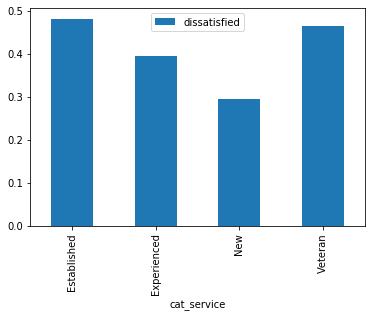

In [139]:
# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline
percent_dsatis.plot(kind='bar')
plt.show()